# Bug Severity Predictor for Mozilla

In this project, I'll build a severity predictor for the [Mozilla project](https://www.mozilla.org/en-US/) that uses the description of a bug report stored a in [Bugzilla Tracking System](https://bugzilla.mozilla.org/home) to predict its severity. 

The severity in the Mozilla project indicates how severe the problem is – from blocker ("application unusable") to trivial ("minor cosmetic issue"). Also, this field can be used to indicate whether a bug is an enhancement request. In my project, I have considered five severity levels: **trivial(0)**, **minor(1)**, **major(2)**, **critical(3)**, and **blocker(4)**. I have ignored the default severity level (often **"normal"**) because this level is considered as a choice made by users when they are not sure about the correct severity level. 

## Exploratory data analysis

This step in machine learning workflow will analyze the dataset to summarize their main characteristics using visual methods. In my project, I'll use a bar and word clouds charts.

### Project setup

The cell below declares the required packages. 

In [1]:
# standard packages
import os

# third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd
import seaborn as sns 

from data_analysis import plot_word_cloud

### Read in the data

The cell below load the cleaned bug reports dataset. This dataset has the following attributes:

| **Attribute** | **Description** |
| :------------ | :-------------- |
| long_description |  The description of a report written when the bug report was opened. |
| severity_code | The target label that represents the bug severity level.|

In [2]:
reports_input_path = os.path.join('..', 'data', 'clean')
reports_data = pd.read_csv(os.path.join(reports_input_path, 'mozilla_bug_report_data.csv'))

In [3]:
reports_data.head()

,long_description,severity_code
0,is broken many users can t enter bugs on it p...,4
1,adding support for custom headers and cookie n...,4
2,the patch in bug regressed the fix from bug th...,2
3,from bugzilla helper user agent mozilla x u li...,2
4,i found it odd that relogin cgi didn t clear o...,1


In [4]:
reports_data.shape

(2388, 2)

### Severity target label distribution

The cell below show the severity target label distibution in the dataset.

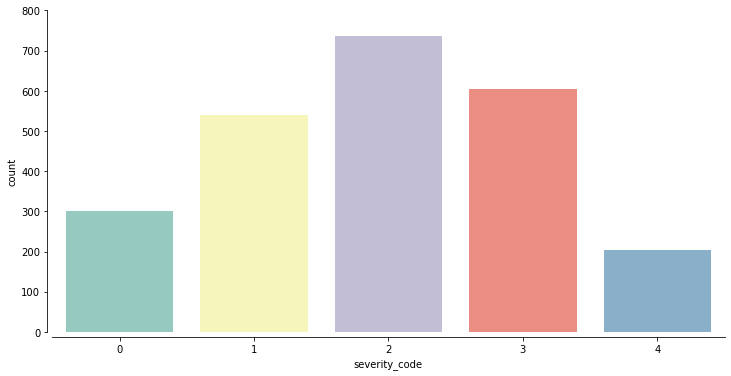

In [5]:
ax=sns.catplot(data=reports_data
              , x="severity_code"
              , height=5
              , aspect=2
              , kind="count"
              , palette="Set3")
sns.despine(offset=5)

ax.set(ylim=(0, 800))

**Conclusion:** The figure above shows that the severity level target-label in the dataset is unbalanced. 

## Word cloud by bug severity level

The cell below plots the word clouds by the severity target, considering 128 words per cloud.

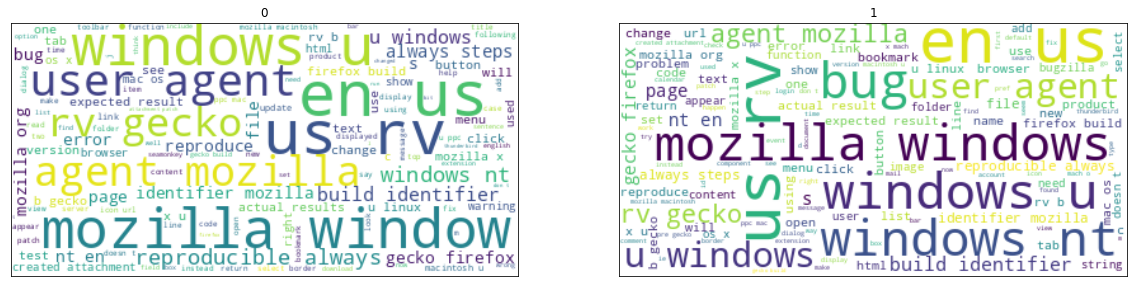

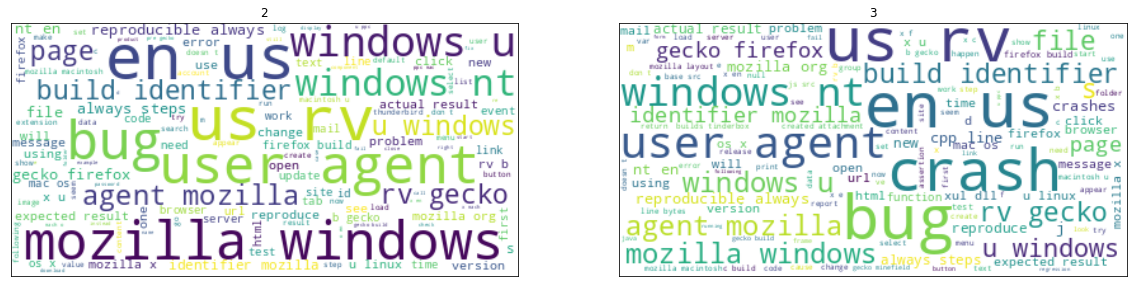

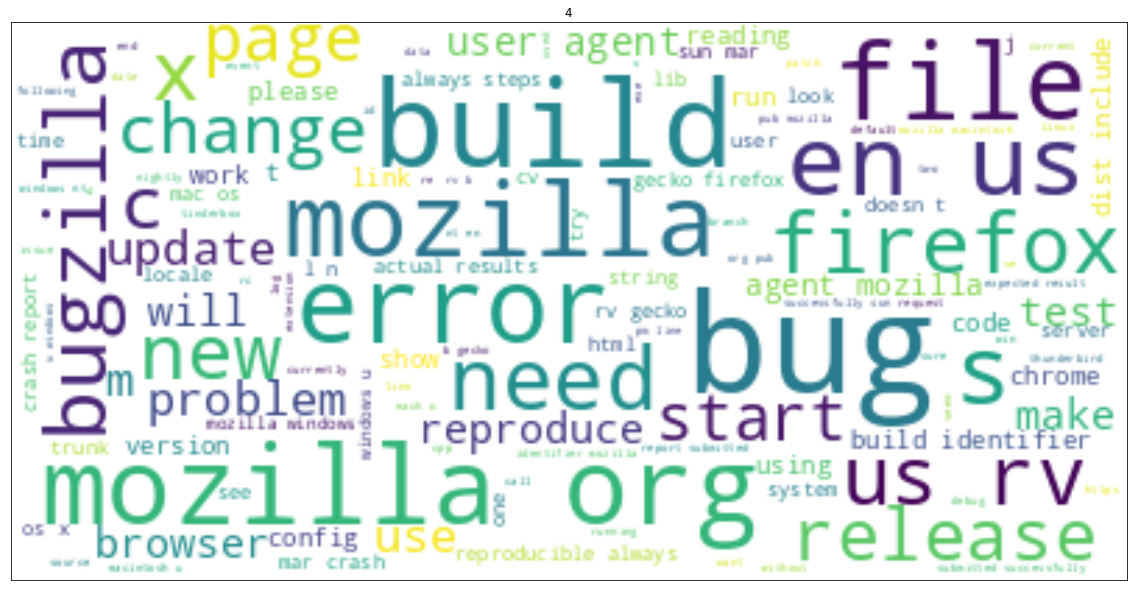

In [6]:
max_len=128
plot_word_cloud(reports_data, [0, 1], max_len)
plot_word_cloud(reports_data, [2, 3], max_len)
plot_word_cloud(reports_data, [4], max_len)

**Conclusion:** It seems that the word clouds above shows some differences according to severity level. 